In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression as linreg

from scipy.interpolate import interp1d as spline

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [28]:
rare = ['4139265.3','4139265.4','4139265.5','4222168.1']
freq = ['4222153.1','4222153.2','4222153.3','4222174.1','4222154.1']

In [29]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!


In [85]:
def make_em_list(mice):
    EM = []
    for mouse in mice:
        print(mouse)
        EM.append(_make_em_list(mouse))
    return EM


def _make_em_list(mouse,df_mouse = None):
    if df_mouse is None:
        df_mouse = df[df['MouseName']==mouse]
    _EM = []
#     print(mouse)
    for i in range(df_mouse.shape[0]):
        
        sess = df_mouse.iloc[i]
        VRDat = pp.behavior_dataframe(sess['data file'])
        trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
        em = trial_info['morphs']+trial_info['wallJitter']+trial_info['bckgndJitter']+trial_info['towerJitter']
        em +=.3
        em /=1.6
#         print(i,em.shape)
        _EM.extend(em.tolist())
    return _EM
    #     N += len(trial_info['morphs'])
    #     m += len(trial_info['morphs']) - (trial_info['morphs']==0).sum() - (trial_info['morphs']==1).sum()
#         print(i)

In [86]:
EM_rare = make_em_list(rare)

4139265.3
4139265.4
4139265.5
4222168.1
deleting last index from trial start
deleting last index from trial start


In [34]:
EM_fam = make_em_list(freq)

4222153.1
4222153.2
4222153.3
4222174.1
4222154.1


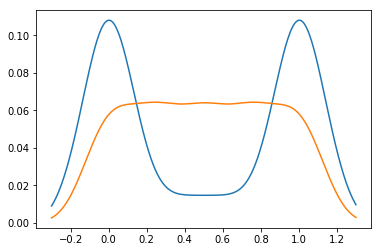

In [54]:
edges = np.linspace(0,1,num=20)

gaussian = lambda mu,sigma,x: np.exp(-(mu-x)**2/sigma**2)
unif = lambda mu, sigma, x: 1*(np.abs(x-mu)<=sigma/2)
samp = np.linspace(-.3,1.3,num=1000)
dens = unif(0,.2,samp)+unif(1,.2,samp)+1E-1
f = unif(.5,.2,samp)
rare_prior = np.convolve(np.convolve(np.convolve(dens,f,mode='same'),f,mode='same'),gaussian(.5,.1,samp),mode='same')
rare_prior = rare_prior/rare_prior.sum()

fig,ax = plt.subplots()
ax.plot(samp,rare_prior*1000/20)


dens = unif(0,.2,samp)+unif(.25,.2,samp) + unif(.5,.2,samp) + unif(.75,.2,samp) + unif(1,.2,samp)+1E-2
f = unif(.5,.2,samp)
fam_prior = np.convolve(np.convolve(np.convolve(dens,f,mode='same'),f,mode='same'),gaussian(.5,.1,samp),mode='same')
fam_prior =fam_prior/fam_prior.sum()
ax.plot(samp,fam_prior*1000/20)

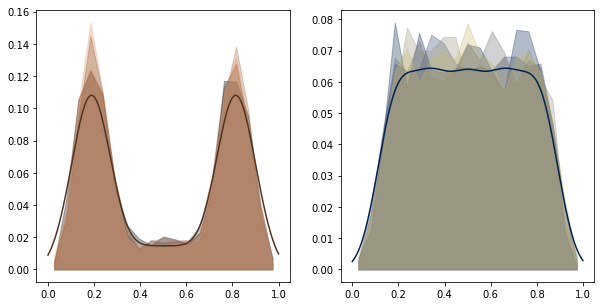

In [56]:
f,ax=plt.subplots(1,2,figsize=[10,5])
for i,_em in enumerate(EM_rare):
    h,trsh = np.histogram(_em,bins=edges)
    ax[0].fill_between((edges[:-1]+edges[1:])/2.,h/h.sum(),color=plt.cm.copper(i/len(rare)),alpha=.3)
ax[0].plot((samp+.3)/1.6,rare_prior*1000/20,color=plt.cm.copper(.25))
    
for i,_em in enumerate(EM_fam):
    h,trsh = np.histogram(_em,bins=edges)
    ax[1].fill_between((edges[:-1]+edges[1:])/2.,h/h.sum(),color=plt.cm.cividis(i/len(freq)),alpha=.3)
ax[1].plot((samp+.3)/1.6,fam_prior*1000/20,color=plt.cm.cividis(0.))
    
f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\python_outputs\\empirical_prior.pdf",format='pdf')

In [72]:
mouse = '4222168.1'
df_mouse = df[df['MouseName']==mouse]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
2467,4222168.1,22_08_2019,1,TwoTower_foraging,200,0,CA1,2019-08-22,G:\My Drive\VR_Data\TwoTower\4222168.1\22_08_2...,None,None,None
2477,4222168.1,23_08_2019,1,TwoTower_foraging,200,0,CA1,2019-08-23,G:\My Drive\VR_Data\TwoTower\4222168.1\23_08_2...,None,None,None
2487,4222168.1,25_08_2019,1,TwoTower_foraging,67,0,CA1,2019-08-25,G:\My Drive\VR_Data\TwoTower\4222168.1\25_08_2...,None,None,None
2490,4222168.1,25_08_2019,3,TwoTower_foraging,48,1,CA1,2019-08-25,G:\My Drive\VR_Data\TwoTower\4222168.1\25_08_2...,None,G:\My Drive\2P_Data\TwoTower\4222168.1\25_08_2...,G:\My Drive\2P_Data\TwoTower\4222168.1\25_08_2...
2502,4222168.1,26_08_2019,1,TwoTower_foraging,200,0,CA1,2019-08-26,G:\My Drive\VR_Data\TwoTower\4222168.1\26_08_2...,None,None,None
2511,4222168.1,27_08_2019,1,TwoTower_foraging,198,0,CA1,2019-08-27,G:\My Drive\VR_Data\TwoTower\4222168.1\27_08_2...,None,None,None
2520,4222168.1,28_08_2019,1,TwoTower_foraging,50,0,CA1,2019-08-28,G:\My Drive\VR_Data\TwoTower\4222168.1\28_08_2...,None,None,None
2521,4222168.1,28_08_2019,2,TwoTower_foraging,80,1,CA1,2019-08-28,G:\My Drive\VR_Data\TwoTower\4222168.1\28_08_2...,None,G:\My Drive\2P_Data\TwoTower\4222168.1\28_08_2...,G:\My Drive\2P_Data\TwoTower\4222168.1\28_08_2...
2522,4222168.1,28_08_2019,3,TwoTower_foraging,79,0,CA1,2019-08-28,G:\My Drive\VR_Data\TwoTower\4222168.1\28_08_2...,None,None,None
2523,4222168.1,28_08_2019,4,TwoTower_foraging,80,0,CA1,2019-08-28,G:\My Drive\VR_Data\TwoTower\4222168.1\28_08_2...,None,None,None


4139265.3
4139265.4
4139265.5
4222168.1
deleting last index from trial start
deleting last index from trial start


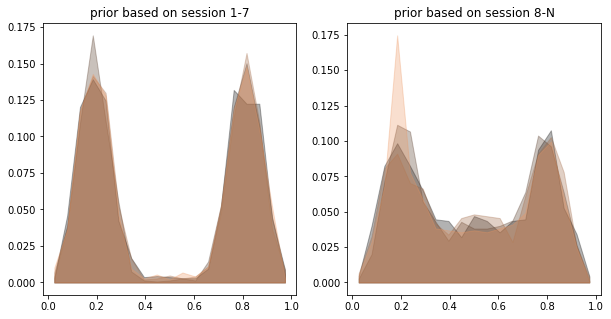

In [76]:
cutoff = [-10,-12,-8,-10]
f,ax=plt.subplots(1,2,figsize=[10,5])
for i,(c,mouse) in enumerate(zip(cutoff,rare)):
    print(mouse)
    df_mouse = df[df['MouseName']==mouse]
    df_m_pre,df_m_post = df_mouse.iloc[:c],df_mouse.iloc[c:]
    _em_pre = _make_em_list(mouse,df_mouse=df_m_pre)
    _em_post = _make_em_list(mouse,df_mouse=df_m_post)
    h,trsh = np.histogram(_em_pre,bins=edges)
    ax[0].fill_between((edges[:-1]+edges[1:])/2.,h/h.sum(),color=plt.cm.copper(i/len(rare)),alpha=.3)
    h,trsh = np.histogram(_em_post,bins=edges)
    ax[1].fill_between((edges[:-1]+edges[1:])/2.,h/h.sum(),color=plt.cm.copper(i/len(rare)),alpha=.3)
ax[0].set_title('prior based on session 1-7')
ax[1].set_title('prior based on session 8-N')
f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\python_outputs\\empirical_prior_prepostimaging.pdf",format='pdf')

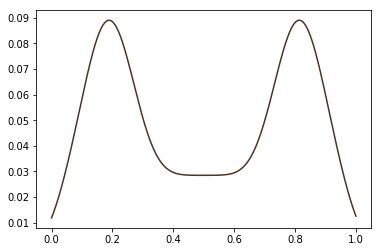

In [82]:
dens = unif(0,.2,samp)+unif(1,.2,samp)+.3
f = unif(.5,.2,samp)
rare_prior = np.convolve(np.convolve(np.convolve(dens,f,mode='same'),f,mode='same'),gaussian(.5,.1,samp),mode='same')
rare_prior = rare_prior/rare_prior.sum()
f,ax = plt.subplots()
ax.plot((samp+.3)/1.6,rare_prior*1000/20,color=plt.cm.copper(0.25))